# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check for missing data

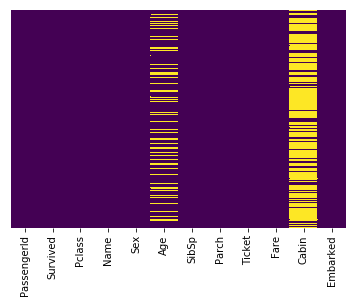

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

We can fill reasonable values in Cabin with information from other rows.

In [8]:
sns.set_style('whitegrid')

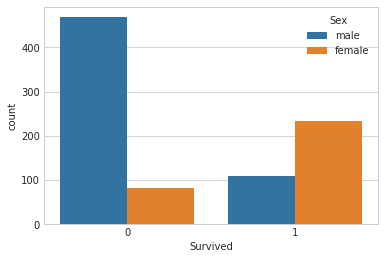

In [15]:
sns.countplot(x='Survived',hue='Sex', data=train);

Females are more likely to survive, according to this preliminary analysis

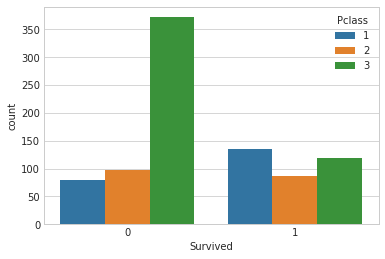

In [16]:
sns.countplot(x='Survived',hue='Pclass', data=train);

And, as expected, those who belong to the worst class are less likely to survive

/home/alvaro/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


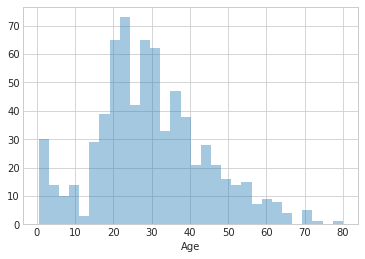

In [18]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30);

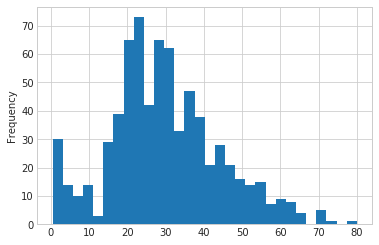

In [19]:
train['Age'].plot.hist(30)

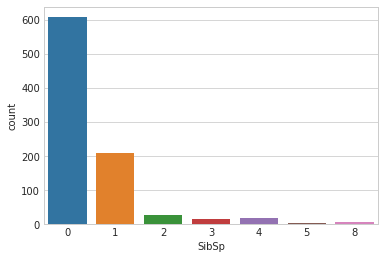

In [20]:
sns.countplot(x='SibSp', data=train)

Most people don't have siblings on board

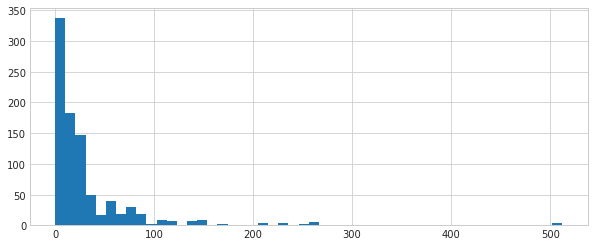

In [23]:
train['Fare'].hist(bins=50, figsize=(10,4))

# Clean Data

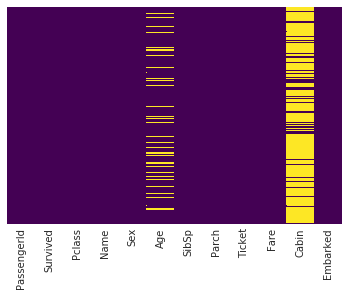

In [24]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

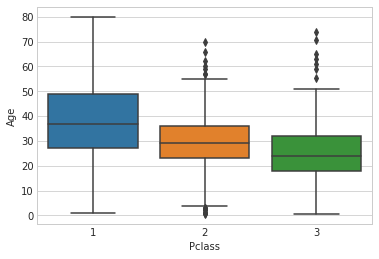

In [25]:
sns.boxplot(x='Pclass', y='Age', data=train)

Wealthier passengers are older than poorer classes. We can use this information to fill in the gaps in the age column.

In [26]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37 # average age for class 1
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [27]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)